# 2022 March Laptop Data Analysis

The data is regarding the laptop prices, rating, model, version, and so on. The data for this project is taken from www.kaggle.com and different python libraries such as matplotlib, pandas and numpy are used learnt from the course offered by jovian.com (Data Analysis with Python: Zero to Pandas. 

## Downloading the Dataset

The dataset will be downloaded using opendatasets from python.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/kuchhbhi/2022-march-laptop-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aanchalkanoria
Your Kaggle Key: ········


100%|██████████| 16.8k/16.8k [00:00<00:00, 18.2MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './2022-march-laptop-data'

In [5]:
import os
os.listdir(data_dir)

['Cleaned_Laptop_data.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Laptop Data Analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project="Laptop Data Analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aanchalkanoria902/laptop-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aanchalkanoria902/laptop-data-analysis


'https://jovian.ai/aanchalkanoria902/laptop-data-analysis'

## Data Preparation and Cleaning

Reading the data and analyzing various aspects.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
# Let us read our data

data = pd.read_csv("./2022-march-laptop-data/Cleaned_Laptop_data.csv")

In [12]:
df=data.copy()

In [13]:
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,DELL,Core,Intel,Core i3,10th,8,DDR4,256,1024,Windows,...,15.6,0,No,No,46390,59101,21,2.9,95,5
892,DELL,Core,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.96,0,No,No,40390,54992,26,3.2,83,15
893,HP,Pavilion,Intel,Core i5,8th,8,DDR4,128,0,Windows,...,13.3,1,No,No,76012,0,0,4.3,129,16
894,ASUS,Vivobook,Intel,Core i3,10th,4,DDR4,0,1024,Windows,...,14.1,0,No,No,33990,39990,15,3.4,31,6


In [14]:
# Lets check our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           871 non-null    object 
 6   ram_type         871 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [15]:
#Checking null values
#isna is used to check nan values present in data or in particular column

df.isna().sum()

brand               0
model               0
processor_brand     0
processor_name      1
processor_gnrtn     0
ram_gb             25
ram_type           25
ssd                 0
hdd                 0
os                  0
os_bit              0
graphic_card_gb     0
weight              0
display_size        0
warranty            0
Touchscreen         0
msoffice            0
latest_price        0
old_price           0
discount            0
star_rating         0
ratings             0
reviews             0
dtype: int64

In [16]:
df.ram_gb.value_counts(dropna=False)

8                503
16               239
4                102
NaN               25
32                12
15.6               6
NVIDIA             2
5                  1
Dual               1
Acer               1
Pre-installed      1
Full               1
Intel              1
Access             1
Name: ram_gb, dtype: int64

AS NUMBER OF NULL VALUES IS SMALL,WE CAN DROP THE NULL VALUES.
ALSO RAM VALUE CAN ONLY BE NUMERICAL VALUE,IT CANNNOT BE 'NVIDIA','Dual','Acer','Pre-installed','Full','Intel','Access','5'. SO WE ARE ALSO DROPPING THE ROWS WHERE RAM_GB = 'NVIDIA','Dual','Acer','Pre-installed','Full','Intel','Access','5'.

In [17]:
filter = data[data['ram_gb'].isin(['NVIDIA','Dual','Acer','Pre-installed','Full','Intel','Access',np.nan,'5'])]
#WE HAVE USED ISIN TO CREATE A NEW DATAFRAME WHERE RAM_GB CONTAINS ONLY THOSE VALUE WHICH WE WANT TO DROP.

index_list = filter.index
data.drop(index_list,inplace=True)

SINCE WE CAN DROP ROWS BY PROVIDING INDEX NUMBER,WE HAVE STORED ALL THE INDEX VALUES IN "FILTER" DATAFRAME

In [18]:
data.ram_gb.value_counts(dropna=False)

8       503
16      239
4       102
32       12
15.6      6
Name: ram_gb, dtype: int64

SINCE WE DO NOT HAVE MUCH NAN VALUES,OUR DATA IS CLEAN AND WE MAY MOVE FURTHER TO DO OUR ANALYSIS, BUT BEFORE DOING ANY TYPE OF ANALYSIS WE MUST GET FAMILIAR WITH OUR DATA

IN ORDER TO GET TO KNOW OUR DATA WE CAN START WITH-

CHECKING OUTLIERS(by using describe(), plotting boxplots etc.),
CHECK IF ANY TYPE OF STANDARIDAZTION TO BE USED( we can make 'brand','model' columns small letter in order to make our analysis easy ,but since some companies write there name in capital letters for ex= 'NVIDEA', some in small = 'Acer', we have kept the data as it is, but it is good idea to make all the string values in one format.)
BEST WAY TO GET TO KNOW THE DATA IS TO VISUALIZE IT, FOR CATEGORICAL DATA WE MAY USE COUNTPLOT,BAR CHART, FOR CONTINUOUS VARIABLES WE MAY USE BOXPLOTS(USED TO CHECK OUTLIERS), LINE CHART(MAJORLY USED IN TIME SERIES DATA) AND MANY MORE.

In [19]:
df.sum()

/tmp/ipykernel_39/1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


brand              ASUSASUSASUSHPHPLenovoHPASUSDELLLenovoHPHPHPLe...
model              CeleronVivoBookVivobookCoreCoreIdeaPad15sCoreV...
processor_brand    IntelIntelIntelIntelIntelIntelAMDIntelIntelInt...
processor_gnrtn    Missing10th10th11th11th10thMissing11th10th10th...
ssd                                                           386848
hdd                                                           171008
os                 WindowsWindowsWindowsWindowsWindowsWindowsWind...
os_bit                                                         53024
graphic_card_gb                                                 1074
weight             CasualCasualCasualThinNlightThinNlightThinNlig...
display_size       15.615.614.115.615.615.615.61415.615.615.615.6...
warranty                                                         620
Touchscreen        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
msoffice           NoNoNoYesNoYesYesNoYesYesNoNoNoYesYesYesNoYesY...
latest_price                      

In [20]:
df.describe()

,ssd,hdd,os_bit,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,431.750000,190.857143,59.178571,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,316.436824,401.181158,11.453644,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,32.000000,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,256.000000,0.000000,64.000000,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,512.000000,0.000000,64.000000,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,512.000000,0.000000,64.000000,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,3072.000000,2048.000000,64.000000,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [21]:
for values in df.columns:
    print('Unique Values in  {0} = {1}\n'.format(values, df[values].unique()))

Unique Values in  brand = ['ASUS' 'HP' 'Lenovo' 'DELL' 'APPLE' 'acer' 'MSI' 'realme' 'RedmiBook'
 'Nokia' 'lenovo' 'Infinix' 'Mi' 'ALIENWARE' 'SAMSUNG' 'MICROSOFT' 'LG'
 'Vaio' 'Smartron' 'Avita' 'iball']

Unique Values in  model = ['Celeron' 'VivoBook' 'Vivobook' 'Core' 'IdeaPad' '15s' 'Vostro' 'Ryzen'
 'Pavilion' 'Ideapad' '2020' 'Aspire' 'Inspiron' 'GF63' 'TUF' 'Book(Slim)'
 '15' 'GF65' 'Book' 'Legion' 'Modern' 'Pro' 'ThinkPad' 'PureBook' 'Swift'
 'MacBook' 'Predator' 'ASUS' 'Katana' 'Zenbook' 'Pentium' 'Nitro' 'Pulse'
 'Alpha' 'ROG' 'Bravo' 'INBook' 'ZenBook' 'Notebook' 'HP' 'Chromebook'
 'Travelmate' '15-ec1105AX' 'Yoga' 'Spectre' 'APU' '2021' 'Thinkbook' 'X1'
 'Lenovo' 'Thinkpad' 'Intel' 'G15' 'Envy' 'EeeBook' '3000' 'x360' '3511'
 'GE76' 'Asus' 'ThinkBook' 'Delta' 'A6-9225' 'G5' 'INSPIRON' '14s' 'G7'
 'Stealth' 'Zephyrus' 'Creator' 'Galaxy' 'Prestige' 'XPS' 'Summit' 'GS66'
 'Sword' 'OMEN' 'Surface' 'Gram' 'Extensa' 'ExpertBook' 'Omen' 'SE' 'GP76'
 'ConceptD' 'E' 't.book' 'GP65' 

In [22]:
#value_counts() is one of the most frequently used to get to know count of any particular category
df.brand.value_counts()

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
LG             5
Vaio           5
realme         4
Nokia          4
Infinix        4
ALIENWARE      4
Smartron       3
lenovo         3
MICROSOFT      3
RedmiBook      3
Mi             2
SAMSUNG        1
iball          1
Name: brand, dtype: int64

In [23]:
import jovian

In [24]:
jovian.commit(project="Laptop Data Analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aanchalkanoria902/laptop-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aanchalkanoria902/laptop-data-analysis


'https://jovian.ai/aanchalkanoria902/laptop-data-analysis'

## Exploratory Analysis and Visualization

Let's explore the data and visualise. 

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

A horizontal bar diagram depicting count of each laptop brand that was sold.  

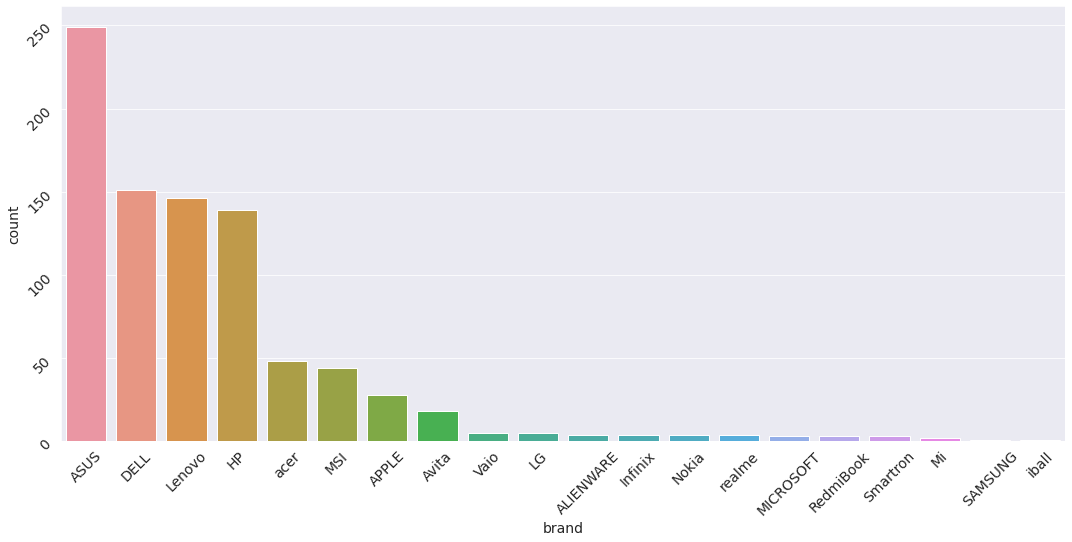

In [26]:
plt.figure(figsize=(18,8))            
sns.countplot(data=data,x='brand',order = data.brand.value_counts(ascending=False).index)
plt.tick_params(labelrotation=45)

countplot() method is used to Show the counts of observations in each categorical bin using bars.

<AxesSubplot:xlabel='ram_gb', ylabel='count'>

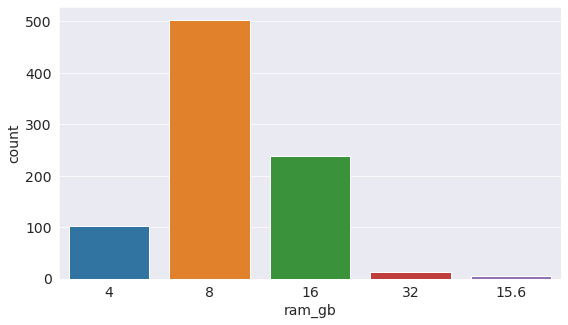

In [27]:
sns.countplot(data=data,x='ram_gb')

RAM value can only be numerical, so we had dropped the null values and made a chart with the other given data. 

A horizontal bar diagram showing counts of first five models. 

<AxesSubplot:>

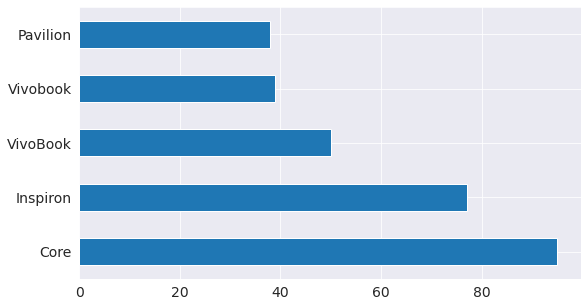

In [28]:
a=df.model.value_counts().head()
a.plot.barh()

Let's combine the model and brand so that we know the model is of which brand.

In [29]:
df.model = df.brand + "--" + df.model
df.model.astype("str")

0       ASUS--Celeron
1      ASUS--VivoBook
2      ASUS--Vivobook
3            HP--Core
4            HP--Core
            ...      
891        DELL--Core
892        DELL--Core
893      HP--Pavilion
894    ASUS--Vivobook
895       Lenovo--v15
Name: model, Length: 896, dtype: object

<AxesSubplot:>

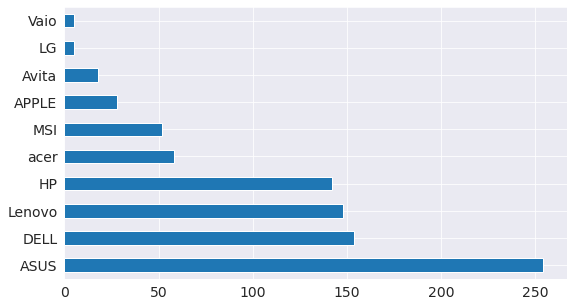

In [30]:
#Top 10 laptop models 
df.brand.value_counts().head(10).plot.barh()

Boxplot is a dense display that aims to provide lots of context for any given data set. The whiskers show the range of values in the data set and box shows the median, lower, and upper quartiles. 

In [31]:
data.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [32]:
cols = ['brand','ram_gb','processor_brand','processor_name']

IN PREVIOUS CELLS WE HAVE ANALYSE ONE FEATURE AT A TIME, BUT IT MAY BE TIRESOME PROCESS TO PLOT SO MANY FEATURES ONE BY ONE
SO FOR PLOTTING ALL THE PLOTS AT ONE TIME,WE HAVE SOMETHING CALLED "SUBPLOTS" IN MATPLOTLIB

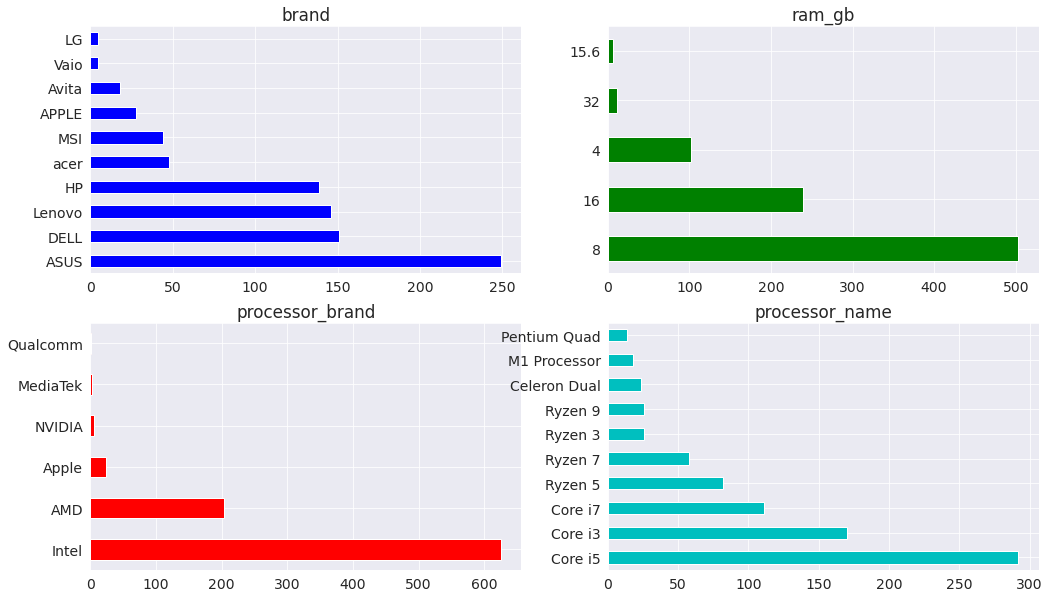

In [33]:
fig, axes = plt.subplots(2,2,figsize=(17,10))   # Necessary step to specify number of axes and figure 
#size( here axes refers to individual plots in whole figure,since we are plotting 4 plots, so we mention (2,2))

colors= ['b','g','r','c']   # different colors for each feature
for i,ax in zip(range(len(cols)),axes.ravel()):   #zip combines iterators(we can pass as many iterators as we want(here we have two 1.for iterating through columns and colors 2. for axes.ravel())
    data[cols[i]].value_counts().head(10).plot.barh(ax=ax,title= cols[i],color = colors[i])

<AxesSubplot:xlabel='latest_price'>

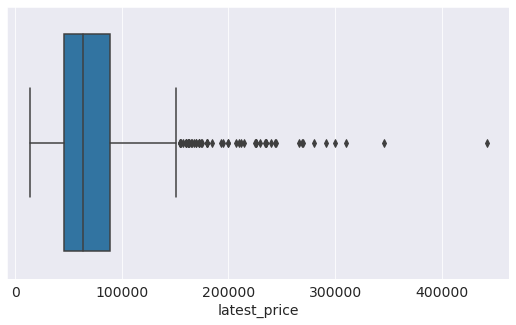

In [34]:
sns.boxplot(data=df,x='latest_price')

Let us save and upload our work to Jovian before continuing

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aanchalkanoria902/laptop-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aanchalkanoria902/laptop-data-analysis


'https://jovian.ai/aanchalkanoria902/laptop-data-analysis'

WE ARE ASSUMING 'STAR_RATING' AS TARGET.

In [37]:
data['star_rating'].describe()

count    862.000000
mean       2.953944
std        1.972989
min        0.000000
25%        0.000000
50%        4.100000
75%        4.400000
max        5.000000
Name: star_rating, dtype: float64

In [38]:
data['star_rating'].value_counts()  

0.0    259
4.4     91
4.3     82
4.5     63
4.2     61
4.1     36
4.7     35
4.0     34
4.6     34
3.8     29
3.9     24
4.8     23
3.7     16
5.0     16
3.4     10
3.6      9
3.3      8
3.5      7
3.0      6
4.9      4
2.8      3
3.2      3
2.5      2
3.1      2
1.7      1
2.7      1
2.3      1
2.0      1
2.9      1
Name: star_rating, dtype: int64

We have 259 laptops rating with 0 rating.

In [39]:
data[data['star_rating'] == 0]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
42,Lenovo,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,1,No,No,52990,84890,37,0.0,0,0
43,acer,Aspire,Intel,Core i3,11th,8,DDR4,256,0,Windows,...,15.6,1,No,No,38990,52999,26,0.0,0,0
77,Lenovo,IdeaPad,Intel,Core i5,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,49990,79690,37,0.0,0,0
90,ASUS,VivoBook,Intel,Core i5,11th,8,DDR4,256,1024,Windows,...,15.6,1,No,No,52990,72990,27,0.0,0,0
99,ASUS,Zenbook,Intel,Core i7,11th,16,LPDDR4X,1024,0,Windows,...,14,1,Yes,Yes,104990,146990,28,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,Avita,Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0
876,Avita,Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0
877,Avita,Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0
878,Avita,Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0


LAPTOPS HAVING STAR_RATINGS== 0 HAS 0 VALUE IN 'ratings' AND 'reviews' COLUMNS, SO WE CANT SAY THE STAR_RATIING ==0 IS EXPLICITLY GIVEN OR THERE IS ALSO CHANCE THAT THERE IS NO RATING GIVEN TO THEM AT ALL.
IT IS BETTER TO DROP VALUES HAVING STAR RATING ==0

<AxesSubplot:>

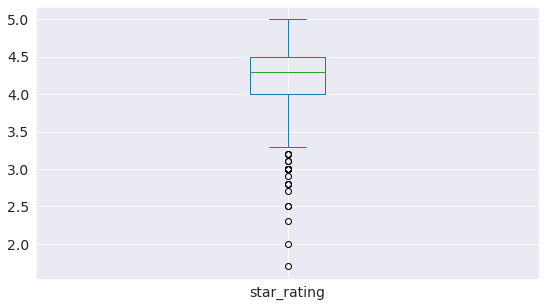

In [40]:
data2 = data[data.star_rating != 0]
data2.star_rating.plot(kind='box')

In [41]:
data['latest_price'].describe()

count       862.000000
mean      74877.500000
std       45647.731463
min       13990.000000
25%       44922.500000
50%       62308.500000
75%       85990.000000
max      441990.000000
Name: latest_price, dtype: float64

#### Which is the costliest laptop?

In [65]:
max_price=[max(df['latest_price'])]
print("Highest price is: ", max_price)

data2['price_cat'] = pd.cut(data2['latest_price'],bins=[0,100000,200000,300000,400000,500000],labels=['<1lakh','1-2lakh','2-3lakhs','3-4lakhs','4-5lakhs'])

Highest price is:  [441990]


/tmp/ipykernel_39/1876261878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price_cat'] = pd.cut(data2['latest_price'],bins=[0,100000,200000,300000,400000,500000],labels=['<1lakh','1-2lakh','2-3lakhs','3-4lakhs','4-5lakhs'])


In [69]:
data2['price_cat'].value_counts()

<1lakh      526
1-2lakh      66
2-3lakhs      8
3-4lakhs      2
4-5lakhs      1
Name: price_cat, dtype: int64

In [70]:
data2[data2['price_cat'] == "4-5lakhs"]  # Costliest laptop

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,price_cat
625,ASUS,Zephyrus,Intel,Core i9,11th,32,DDR4,3072,0,Windows,...,1,No,No,441990,0,0,5.0,1,1,4-5lakhs


In [42]:
data.discount.describe()

count    862.000000
mean      18.634571
std       10.383242
min        0.000000
25%       11.000000
50%       19.000000
75%       25.000000
max       57.000000
Name: discount, dtype: float64

## Asking and Answering Questions




#### Which is the highest sold processor?

<AxesSubplot:>

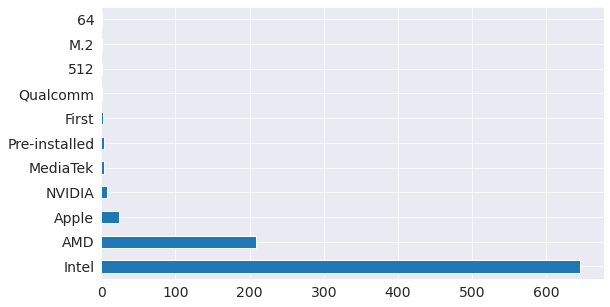

In [77]:
df['processor_brand'].value_counts().plot.barh()

#### Which brand has the highest sale?

<AxesSubplot:>

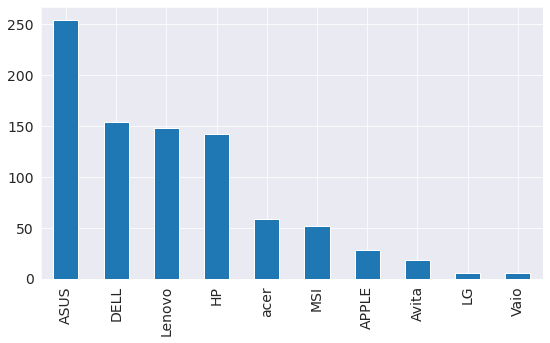

In [78]:
df.brand.value_counts().head(10).plot.bar()

#### Which processor is the most used?

<AxesSubplot:>

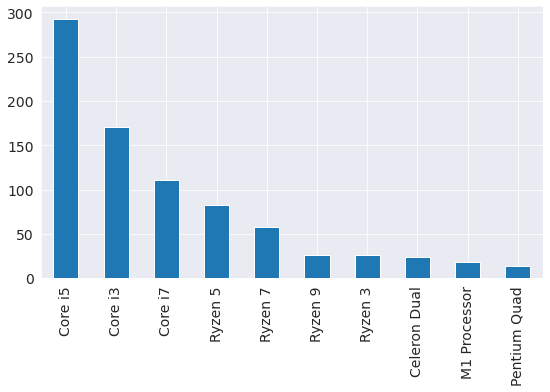

In [80]:
df['processor_name'].value_counts().head(10).plot.bar()

#### Is there a relationship between higher rating and price?

<AxesSubplot:xlabel='latest_price', ylabel='star_rating'>

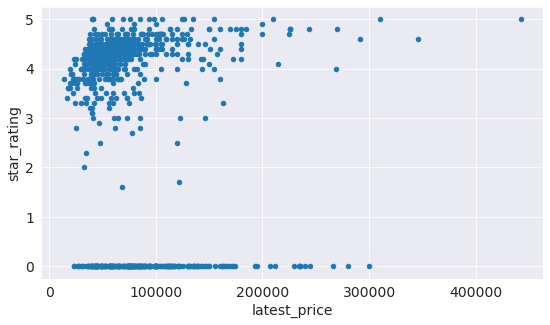

In [89]:
df[['latest_price','star_rating']].plot.scatter(x='latest_price',y='star_rating')

<AxesSubplot:xlabel='latest_price', ylabel='star_rating'>

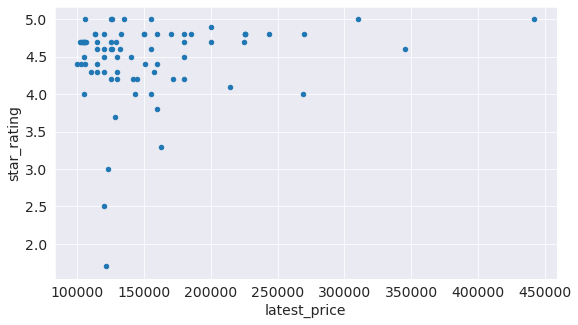

In [71]:
data2[data2['latest_price'] > 100000][['latest_price','star_rating']].plot.scatter(x='latest_price',y='star_rating')  

#### What is the relation between rating and discount?

<AxesSubplot:xlabel='star_rating', ylabel='discount'>

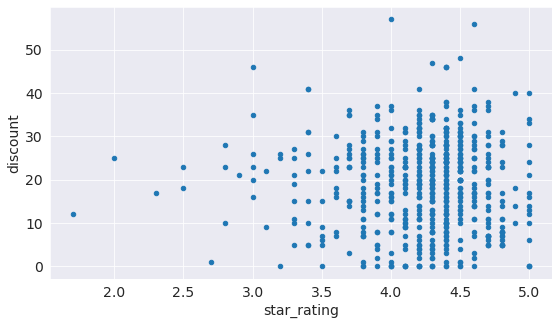

In [75]:
data2.plot.scatter(x="star_rating",y='discount') 

Let us save and upload our work to Jovian before continuing.

#### ANALYSING LAPTOPS WHICH HAVE PRICE MORE THAN 1 LAKH AND HAVE LOW RATINGS-

<AxesSubplot:>

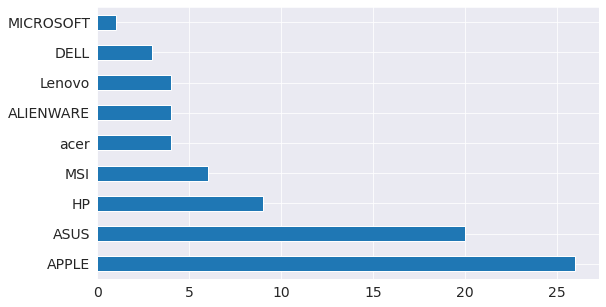

In [76]:
data2[data2['latest_price'] > 100000].brand.value_counts().plot.barh()

In [77]:
data2[(data2['latest_price'] > 100000)&(data2['star_rating'] < 3.5)]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,price_cat
421,Lenovo,Yoga,Intel,Core i7,11th,16,LPDDR4X,1024,0,Windows,...,1,No,Yes,122990,167890,26,3.0,4,2,1-2lakh
495,DELL,XPS,Intel,Core i7,8th,16,DDR3,512,0,Windows,...,1,No,Yes,121890,139104,12,1.7,3,0,1-2lakh
645,HP,Spectre,Intel,Core i7,10th,16,DDR4,512,0,Windows,...,1,Yes,No,162990,192977,15,3.3,3,1,1-2lakh
699,Lenovo,Yoga,Intel,Core i7,10th,16,LPDDR4X,1024,0,Windows,...,0,No,No,119990,148082,18,2.5,2,1,1-2lakh


#### TWO OUT OF FOUR LAPTOPS ARE LENOVO YOGA WITH PRICE MORE THAN 100000 AND RATING LESS THAN 3.5.
#### THIS IS THE REASON HIGH DISCONTS ARE GIVEN ON THESE LAPTOPS.

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aanchalkanoria902/laptop-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aanchalkanoria902/laptop-data-analysis


'https://jovian.ai/aanchalkanoria902/laptop-data-analysis'

## Inferences and Conclusion

**INFERENCES** 
(1) Intel is the highest sold processor after AMD.
(2) ASUS has the highest sales, followed by DELL. 
(3) Most used processor is Corei5, followed by Corei3.
(4) Laptops having higher price are mostly rated more than 4. 
(5) Higher the rating, lesser is the discount. 
(6) Asus's Zephyrus is the costliest laptop.

In [80]:
import jovian

In [81]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aanchalkanoria902/laptop-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aanchalkanoria902/laptop-data-analysis


'https://jovian.ai/aanchalkanoria902/laptop-data-analysis'

## References and Future Work

Further we can analyse the factors on which ratings and prices depend. We can also interpret if customers are inclined towards warranty period, ram_type, os, and so on. 

In [82]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aanchalkanoria902/laptop-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aanchalkanoria902/laptop-data-analysis


'https://jovian.ai/aanchalkanoria902/laptop-data-analysis'